CSV Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-n

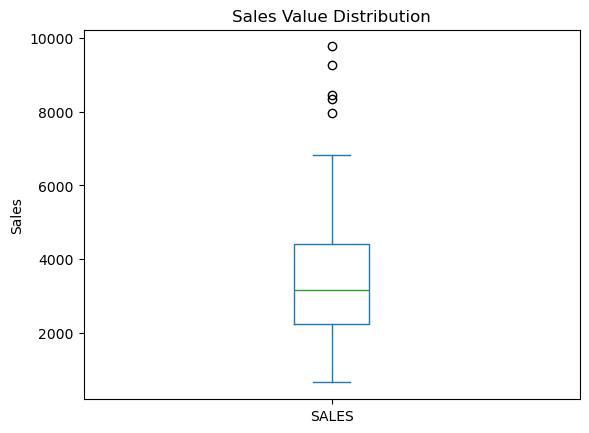

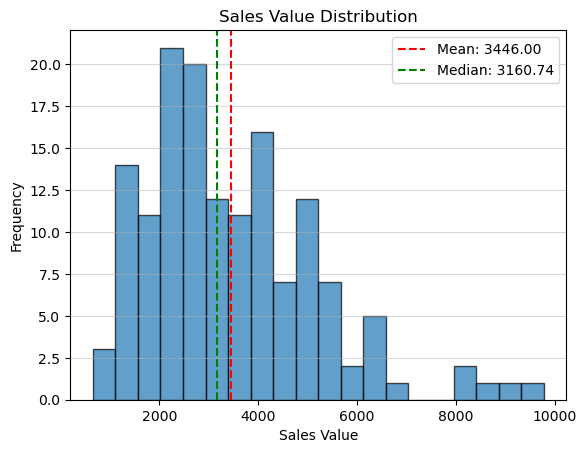

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import json

# Load sales data from CSV file
try:
    csv = pd.read_csv("sales_data_sample.csv", encoding="cp1252")
except FileNotFoundError:
    print("CSV file not found. Please check the file path.")
except pd.errors.ParserError:
    print("Error parsing CSV file.")

# Load sales data from Excel file
try:
    ed = pd.read_excel("Sample-Sales-Data.xlsx")
except FileNotFoundError:
    print("Excel file not found. Please check the file path.")

# Load customer data from JSON file and convert to DataFrame
try:
    with open("customers.json", "r") as json_file:
        json_data = json.load(json_file)
    json_df = pd.DataFrame(json_data)
except FileNotFoundError:
    print("JSON file not found. Please check the file path.")
except json.JSONDecodeError:
    print("Error decoding JSON file.")

# Explore and clean the CSV data
print("CSV Data Info:")
csv.info()
print(csv.tail())
print(csv.describe())
csv = csv.dropna().drop_duplicates()

# Explore and clean the Excel data
print("Excel Data Info:")
ed.info()
print(ed.head())
print(ed.tail())
print(ed.describe())
ed = ed.dropna().drop_duplicates()

# Explore and clean the JSON data
print("JSON Data Info:")
json_df.info()
print(json_df.head())
json_df = json_df.dropna().drop_duplicates()

# Combine all three datasets into a unified DataFrame
# Note: Adjust the merge logic based on the common key if applicable
unified_data = pd.concat([csv, ed, json_df], ignore_index=True)

# Perform data analysis
# Calculate total sales
total_sales = unified_data['SALES'].sum()
print("Total Sales:", total_sales)

# Calculate average sales per order
average_sales_per_order = unified_data['SALES'].mean()
print("Average Sales per Order:", average_sales_per_order)

# Calculate sales by product category (example, adjust as needed)
# Assuming there is a column 'PRODUCTCATEGORY' in your dataset
if 'PRODUCTCATEGORY' in unified_data.columns:
    sales_by_category = unified_data.groupby('PRODUCTCATEGORY')['SALES'].sum()
    print("Sales by Category:")
    print(sales_by_category)

# Visualize sales by product category using a pie chart
if 'PRODUCTCATEGORY' in unified_data.columns:
    sales_by_category.plot(kind='pie', autopct='%1.1f%%')
    plt.title('Sales Distribution by Product Category')
    plt.ylabel('')
    plt.show()

# Calculate the distribution of sales and create a box plot
unified_data['SALES'].plot(kind='box')
plt.title('Sales Value Distribution')
plt.ylabel('Sales')
plt.show()

sales_mean = unified_data['SALES'].mean()
sales_median = unified_data['SALES'].median()

plt.hist(unified_data['SALES'], bins=20, edgecolor='black', alpha=0.7)
plt.axvline(sales_mean, color='r', linestyle='--', label=f'Mean: {sales_mean:.2f}')
plt.axvline(sales_median, color='g', linestyle='--', label=f'Median: {sales_median:.2f}')
plt.title('Sales Value Distribution')
plt.xlabel('Sales Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', alpha=0.5)
plt.show()